<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = ваш балл + котобонус

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`
Чтобы зафиксировать начальное значение при генерации случайных чисел.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ

Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [103]:
# your code here
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [104]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,96 Nm at 3000 rpm,5.0


In [122]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6,1197.0,81.83,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.9,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0,1498.0,98.6,200Nm@ 1750rpm,5.0


In [117]:
df_train.columns[df_train.isnull().any()].tolist()

['mileage', 'engine', 'max_power', 'torque']

In [116]:
df_test.columns[df_train.isnull().any()].tolist()

['mileage', 'engine', 'max_power', 'torque']

In [119]:
df_train.duplicated().sum()

985

In [123]:
df_test.duplicated().sum()

62

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/home/de5cd7ef-3f09-4b48-ab69-7eb970102789/.local/lib/python3.10/site-packages/ydata_profiling/model/missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '--'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

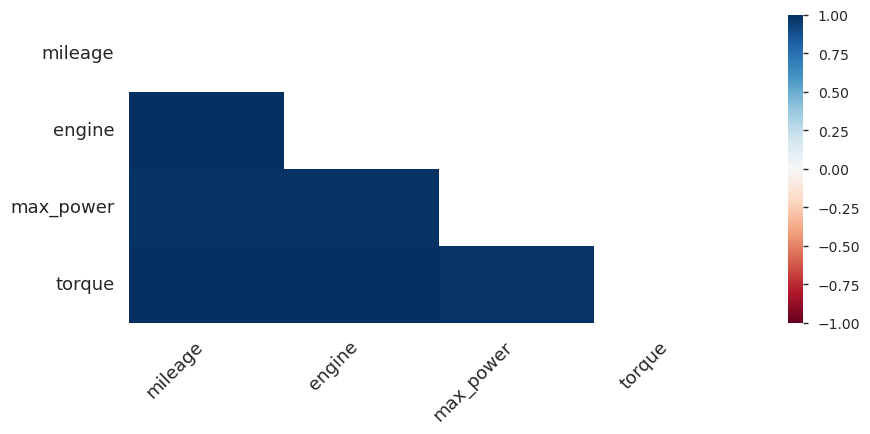

In [127]:
from ydata_profiling import ProfileReport

profile_train = ProfileReport(df_train, title="Data_report_train", explorative=True)
profile_train.to_file("dashboard_train.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/home/de5cd7ef-3f09-4b48-ab69-7eb970102789/.local/lib/python3.10/site-packages/ydata_profiling/model/missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '--'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

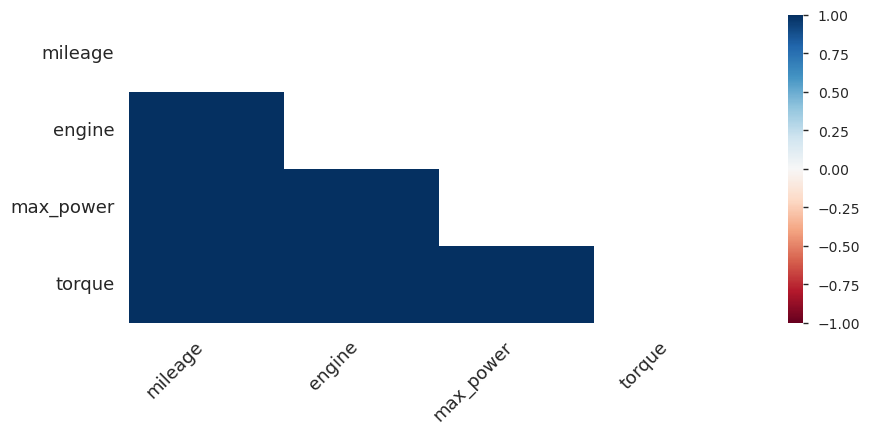

In [128]:
profile_test = ProfileReport(df_test, title="Data_report_train", explorative=True)
profile_test.to_file("dashboard_train.html")

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [11]:
df_train_filled = df_train
df_test_filled = df_test

In [12]:
# your code here
medians = df_train['seats'].median()
medians

5.0

In [13]:
df_train_filled['seats'] = df_train['seats'].fillna(medians)
df_train_filled.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats              0
dtype: int64

In [14]:
#df_train_filled.info()

In [15]:
df_test_filled['seats'] = df_test['seats'].fillna(medians)
df_test_filled.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats             0
dtype: int64

In [16]:
#df_test_filled.info()

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [17]:
#Определяем название целевой переменной и список признаковых столбцов
target = 'selling_price'
feature_cols = [col for col in df_train_filled.columns if col != target]

In [18]:
# your code here
duplicates_mask = df_train_filled.duplicated(subset=feature_cols, keep=False)
df_duplicates = df_train_filled[duplicates_mask]

duplicate_count = df_duplicates.shape[0]
print(f"Количество объектов с одинаковым признаковым описанием: {duplicate_count}")
print("\nОбъекты с одинаковым признаковым описанием:")
print(df_duplicates)

Количество объектов с одинаковым признаковым описанием: 1799

Объекты с одинаковым признаковым описанием:
                                          name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type trans

In [19]:
# Удаляем повторяющиеся строки, оставляя первую запись при наличии разницы в цене
df_train_cleaned = df_train_filled.drop_duplicates(subset=feature_cols, keep='first')

In [20]:
# Обновляем индексы строк так, чтобы они шли от 0 без пропусков
df_train_cleaned.reset_index(drop=True, inplace=True)

In [23]:
assert df_train_cleaned.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [24]:
# your code here
cols_to_clean = ['mileage', 'engine', 'max_power']

In [25]:
df_train_cleaned[cols_to_clean].isnull().sum()

mileage      186
engine       186
max_power    183
dtype: int64

In [26]:
df_test_filled[cols_to_clean].isnull().sum()

mileage      19
engine       19
max_power    19
dtype: int64

In [27]:
def clean_column(col):
    cleaned = col.astype(str).str.replace(r'[^0-9.]', '', regex=True)
    cleaned = cleaned.replace('', np.nan)
    return cleaned

In [28]:
# Применяем очистку и преобразование для каждого нужного столбца в train и test
for col in cols_to_clean:
    df_train_cleaned.loc[:, col] = pd.to_numeric(clean_column(df_train_cleaned[col]), errors='coerce')
    df_test_filled.loc[:, col] = pd.to_numeric(clean_column(df_test_filled[col]), errors='coerce')

In [29]:
# Удаляем столбец 'torque' из обоих датасетов
df_train_cleaned = df_train_cleaned.copy()
df_train_cleaned.drop(columns=['torque'], inplace=True)

In [30]:
df_test_cleaned = df_test_filled.copy()
df_test_cleaned.drop(columns=['torque'], inplace=True)

In [31]:
# Проверка: выводим типы данных и несколько строк для визуального контроля
df_train_cleaned.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
seats            float64
dtype: object

In [137]:
df_train_cleaned[['mileage', 'engine', 'max_power']] = df_train_cleaned[['mileage', 'engine', 'max_power']].astype(float)
df_train_cleaned.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats              int64
dtype: object

In [134]:
df_test_cleaned.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

In [138]:
df_test_cleaned[['mileage', 'engine', 'max_power']] = df_test_cleaned[['mileage', 'engine', 'max_power']].astype(float)
df_test_cleaned.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats              int64
dtype: object

In [34]:
df_test_cleaned.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
seats             0
dtype: int64

In [35]:
df_train_cleaned.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          186
engine           186
max_power        184
seats              0
dtype: int64

In [40]:
for col in cols_to_clean:
    # Вычисляем медиану по обучающему набору
    median_val = df_train_cleaned[col].median()
    
    # Заполняем пропуски в обучающем наборе
    df_train_cleaned[col].fillna(median_val, inplace=True)
    
    # Заполняем пропуски в тестовом наборе тем же значением
    df_test_cleaned[col].fillna(median_val, inplace=True)

In [41]:
df_test_cleaned.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [42]:
df_train_cleaned.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [43]:
# your code here
df_test_cleaned[['engine', 'seats']] = df_test_cleaned[['engine', 'seats']].astype(int)
df_test_cleaned[['engine', 'seats']] = df_test_cleaned[['engine', 'seats']].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [45]:
# your code here
print("Статистика по числовым признакам для train:")
print(df_train_cleaned.describe())

print("\nСтатистика по числовым признакам для test:")
print(df_test_cleaned.describe())

Статистика по числовым признакам для train:
              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5

In [46]:
print("\nСтатистика по категориальным признакам для train:")
print(df_train_cleaned.describe(include=['object']))

print("\nСтатистика по категориальным признакам для test:")
print(df_test_cleaned.describe(include=['object']))


Статистика по категориальным признакам для train:
                          name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

Статистика по категориальным признакам для test:
                       name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623


In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6999 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [48]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 547.6+ KB


In [49]:
#количество столбцов теперь 12, а не 13, потому что мы удалили torque:
#assert df_train_cleaned.shape == (5840, 13)

In [50]:
assert df_train_cleaned.shape == (5840, 12)

## **Визуализации**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

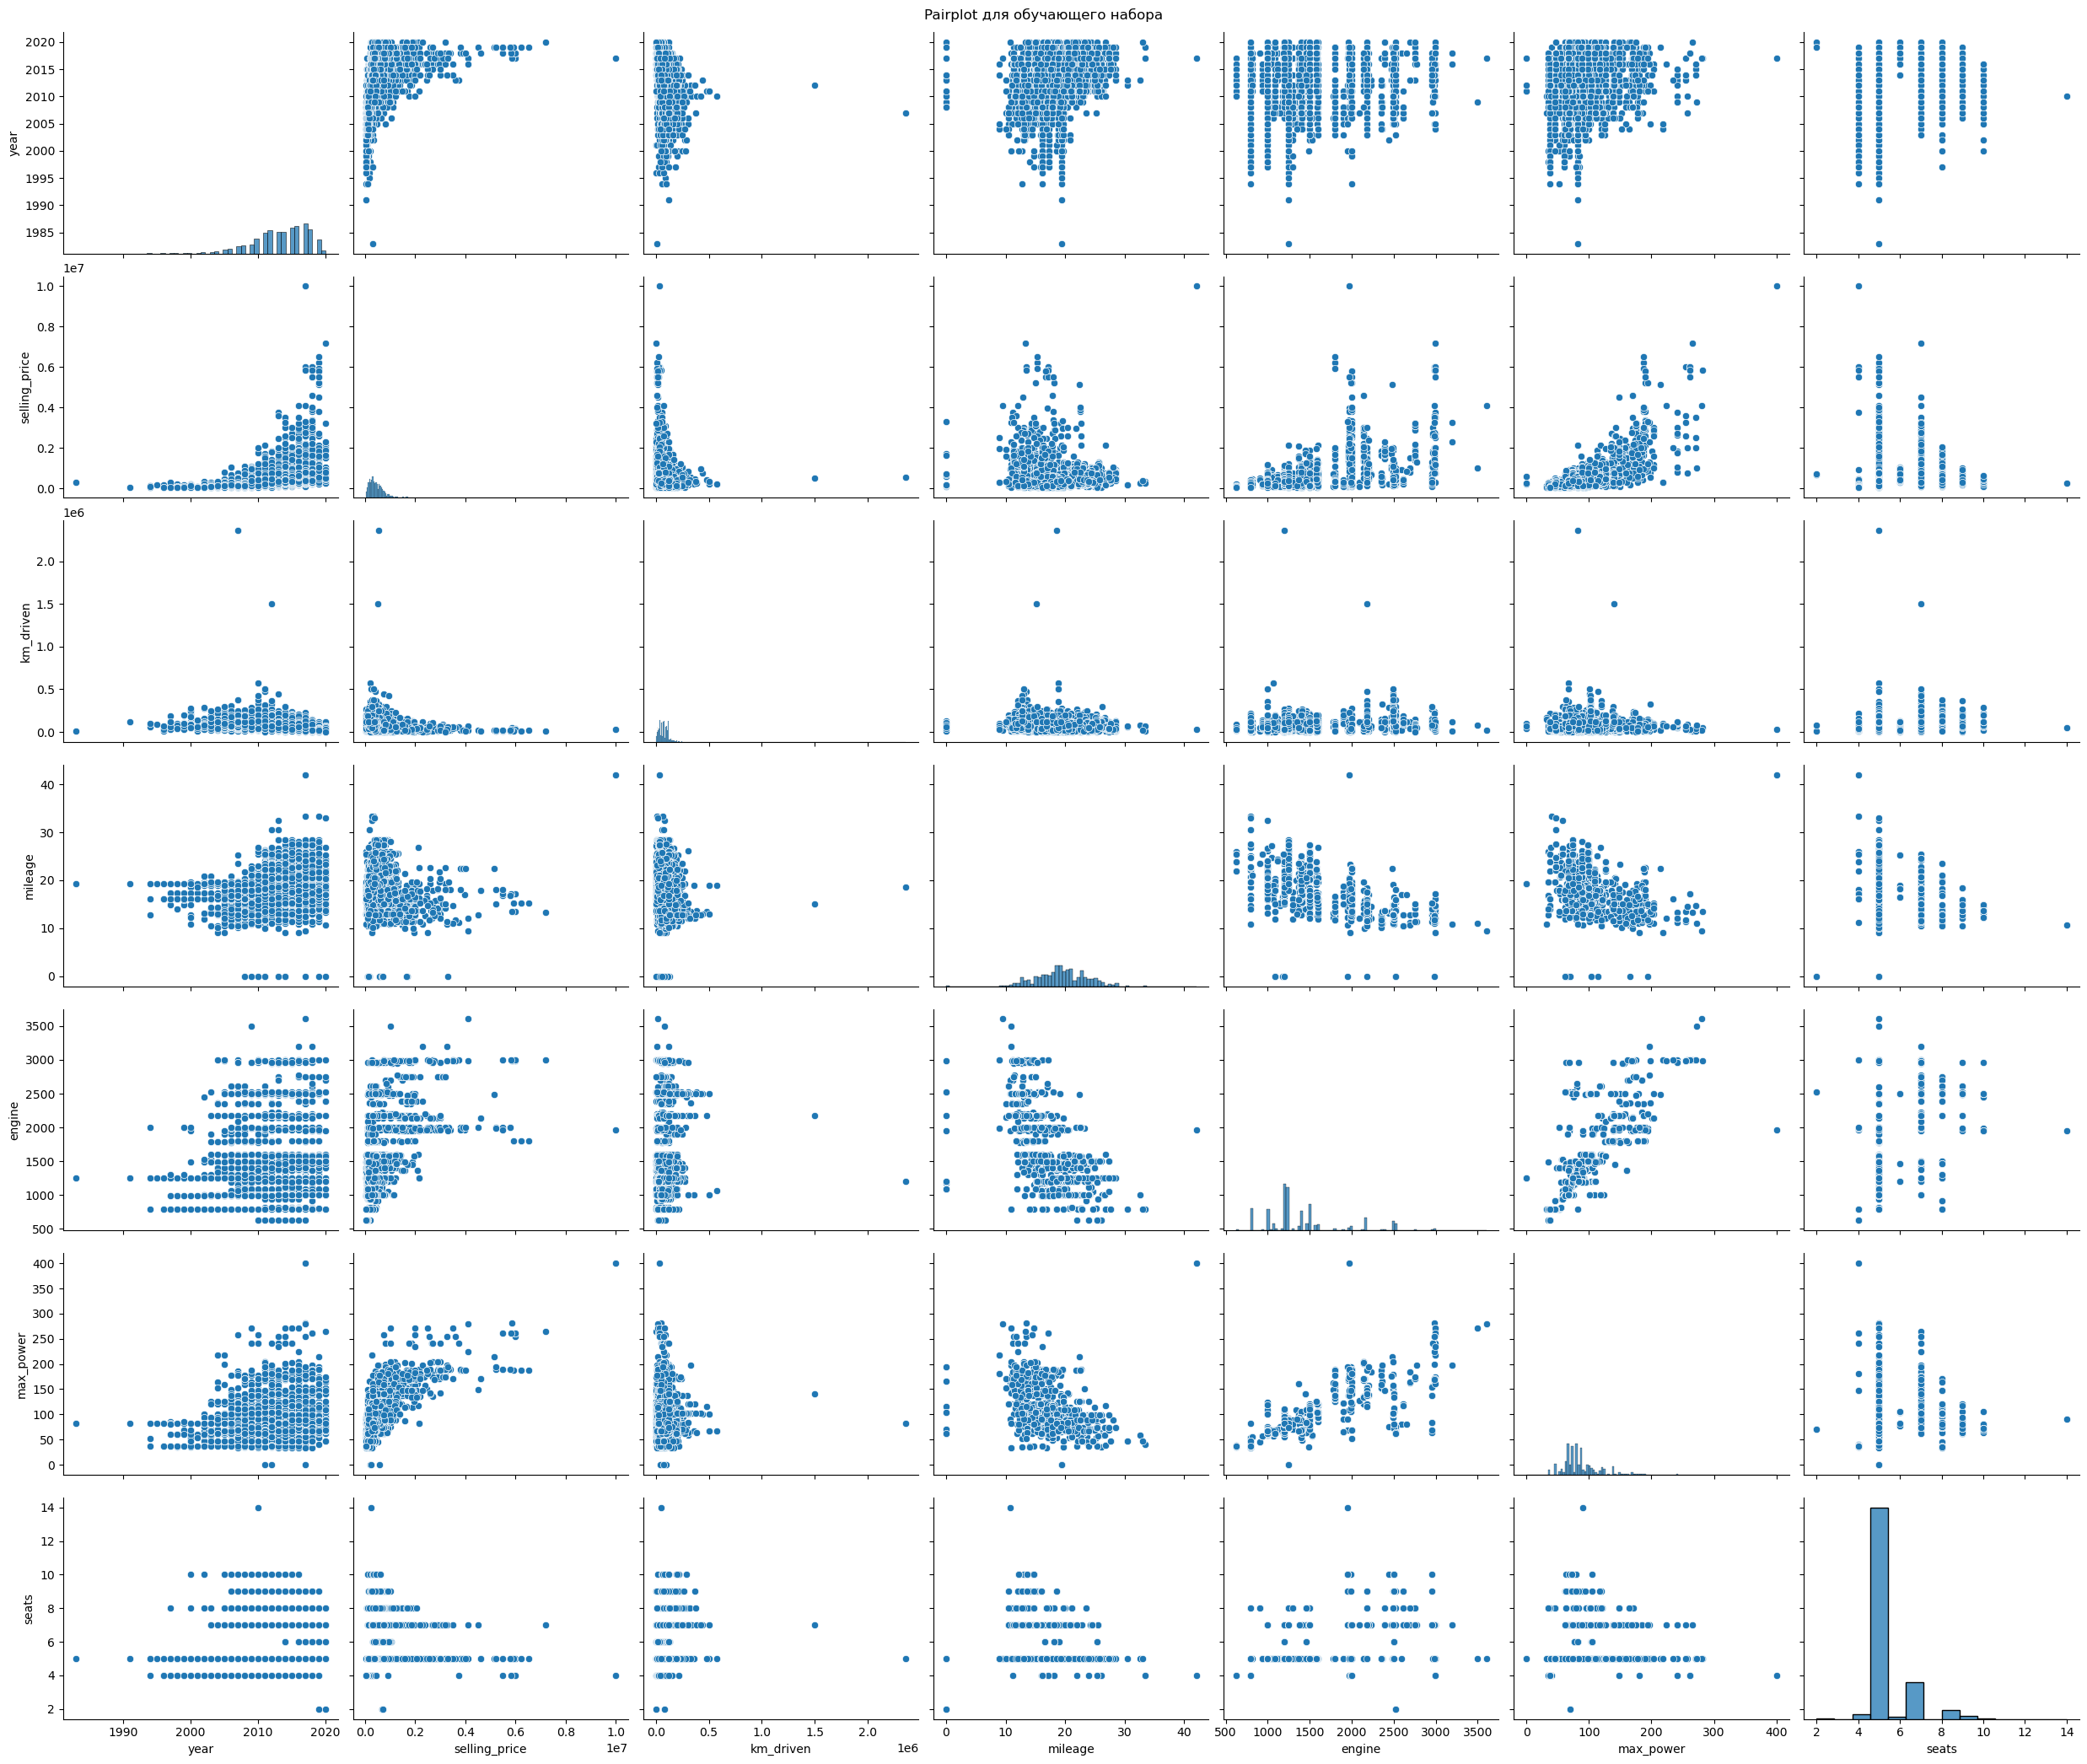

In [56]:
# your code here
sns.pairplot(df_train_cleaned, height=3, aspect=1.2)
plt.suptitle("Pairplot для обучающего набора", y=1.00)
plt.show()

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

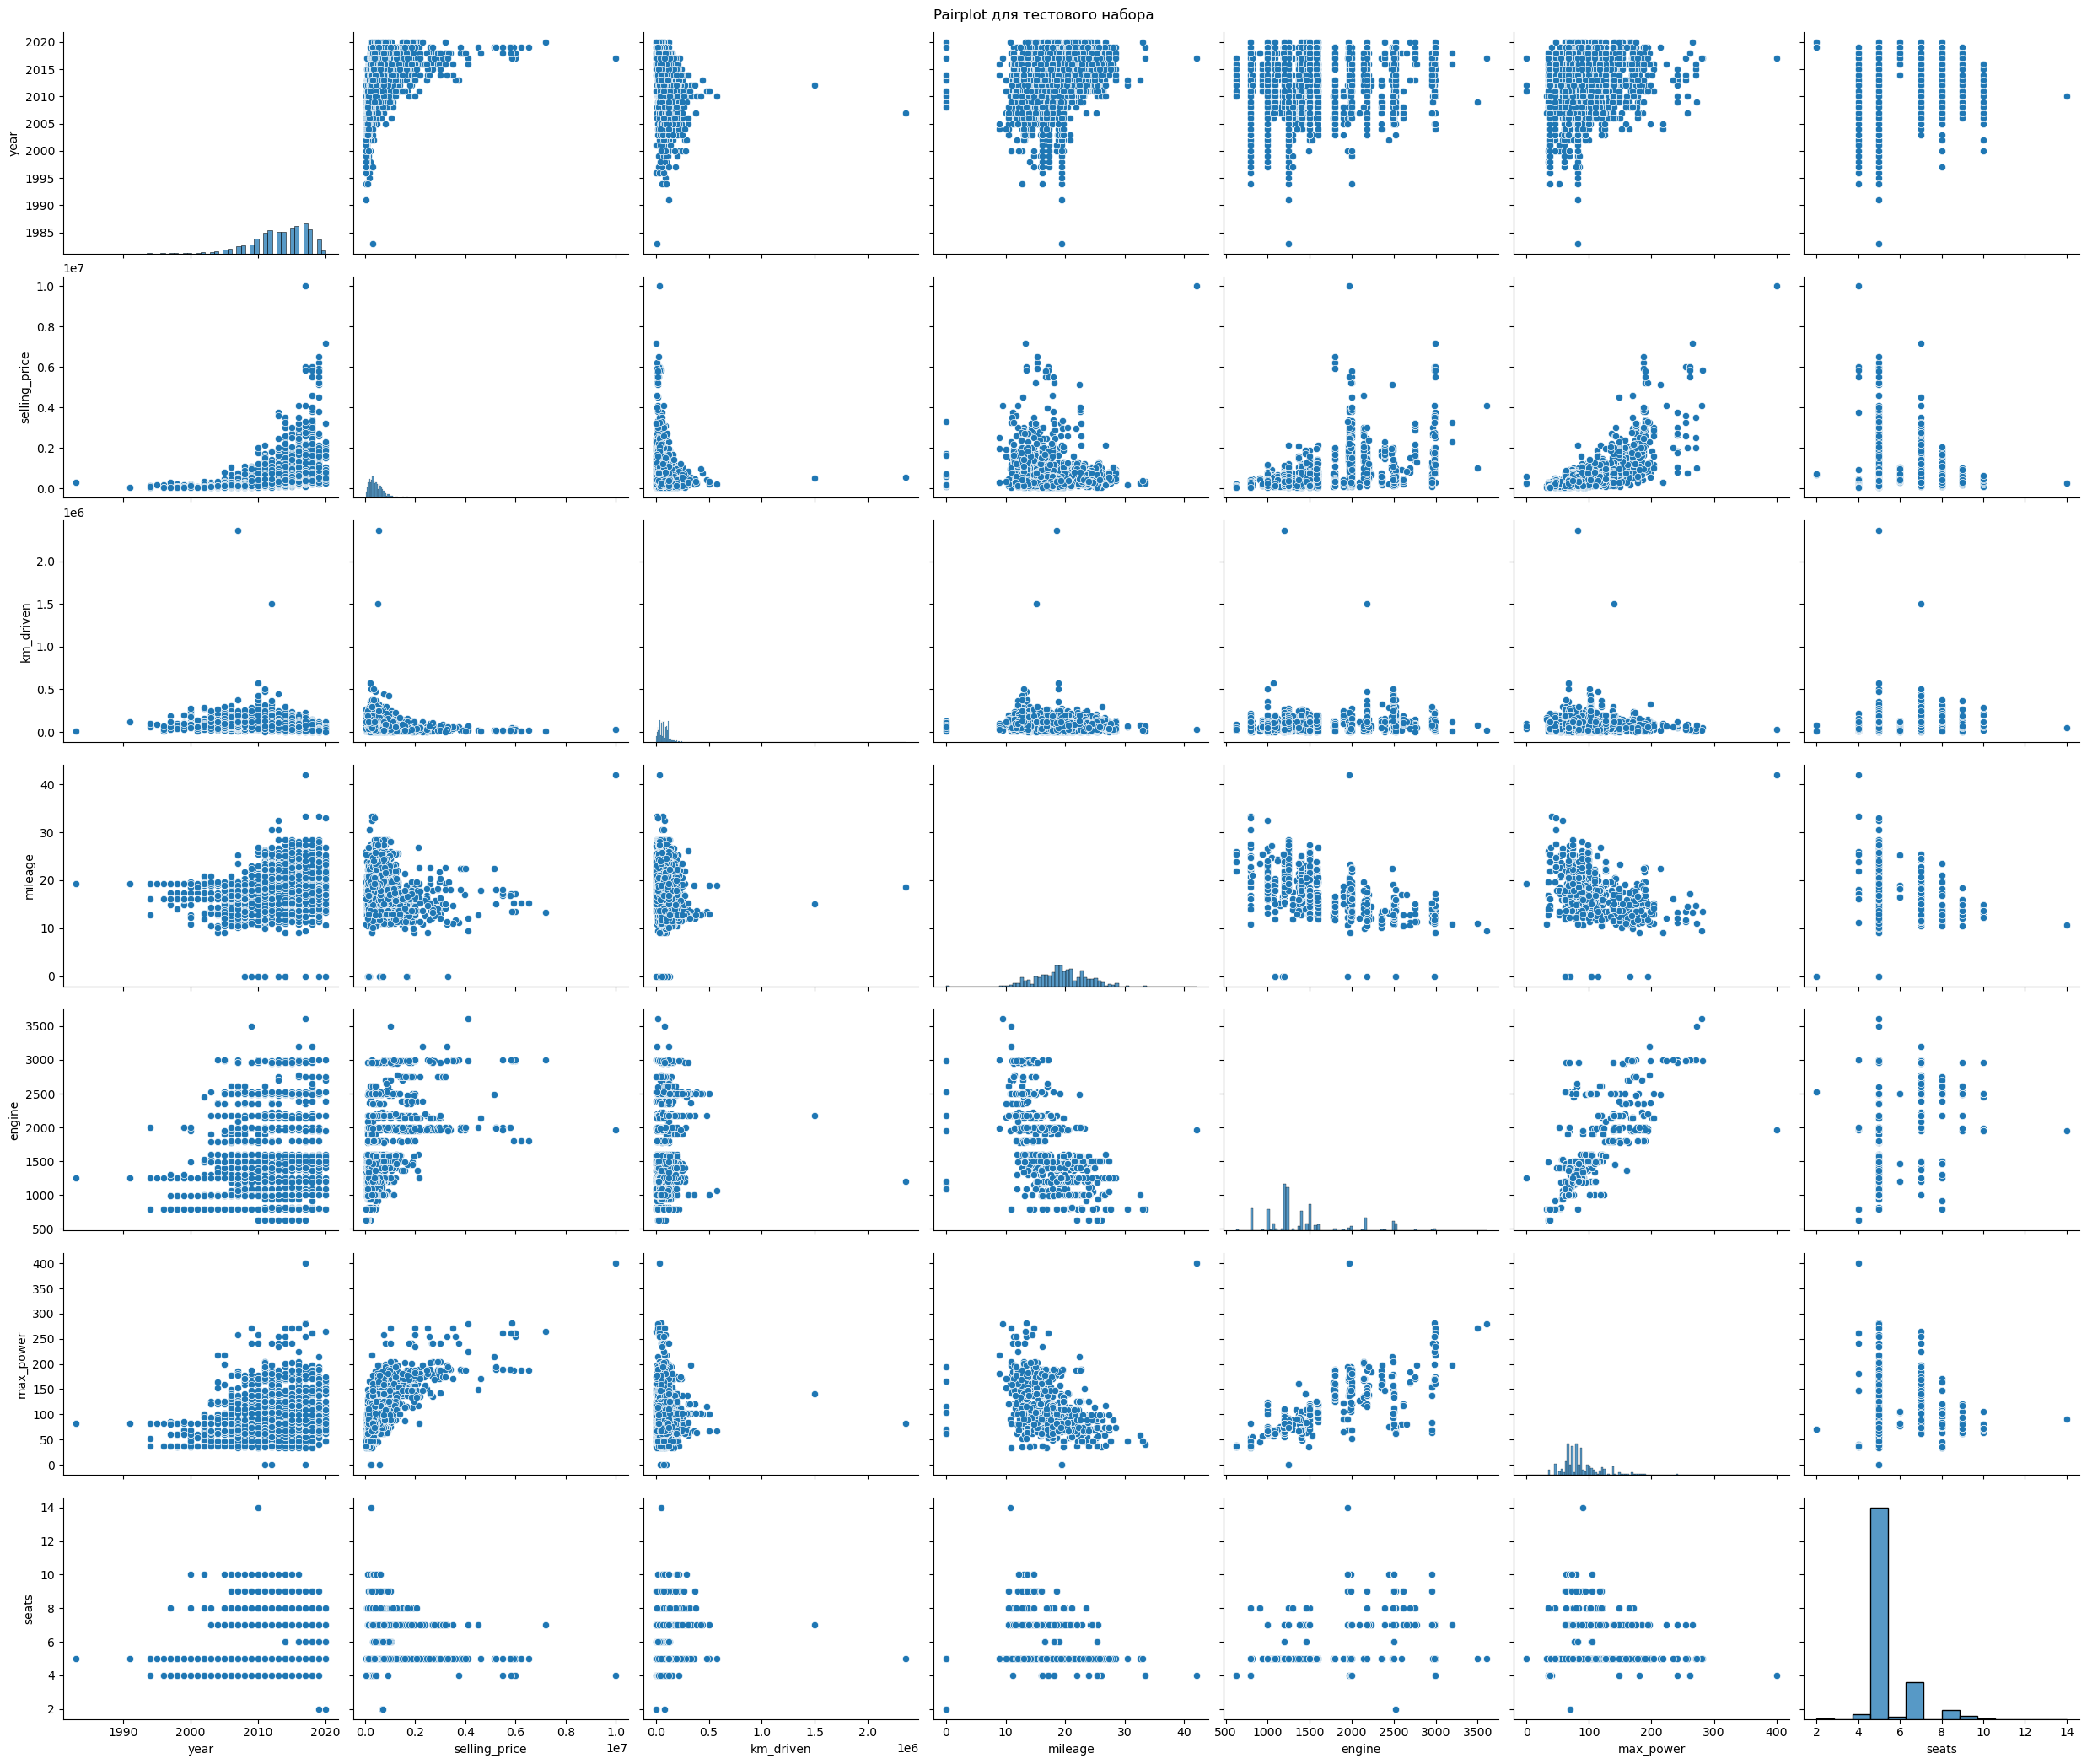

In [57]:
# your code here
sns.pairplot(df_train_cleaned, height=3, aspect=1.2)
plt.suptitle("Pairplot для тестового набора", y=1.00)
plt.show()

`Your answer here`
### Все числовые имеют связь с целевой переменной. Коррелируют они примерно так:
- чем моложе машина, тем выше цена
- чем меньше пробег, тем выше цена
- среди машин с меньшим расходом больше дорогих машин, чем среди машин с большим расходом
- чем больше объем двигателя, тем выше цена
- чем больше мощность, тем выше цена
- чем меньше сидений, тем выше цена

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [59]:
# your code here
corr_matrix_train = numeric_train.corr()

In [60]:
print("Матрица корреляций:")
print(corr_matrix_train)

Матрица корреляций:
                   year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage        0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine         0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power      0.156858       0.692814   0.024588 -0.373390  0.681117   
seats          0.041178       0.149953   0.192328 -0.451059  0.652172   

               max_power     seats  
year            0.156858  0.041178  
selling_price   0.692814  0.149953  
km_driven       0.024588  0.192328  
mileage        -0.373390 -0.451059  
engine          0.681117  0.652172  
max_power       1.000000  0.244112  
seats           0.244112  1.000000  


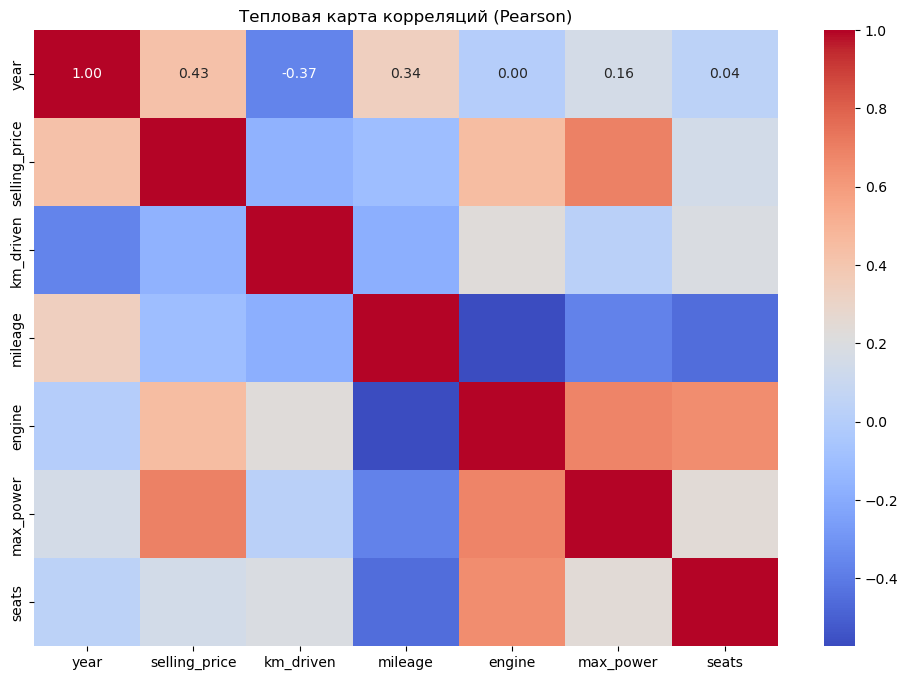

In [61]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Тепловая карта корреляций (Pearson)")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`
- Наименее скоррелированы: km_driven и engine
- Сильная положительная линейная зависимость наблюдается между: selling price и max_power, year, engine
- Да, можно сказать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

###  Ответ: кроме pairplot и тепловой карты, можно построить отдельные графики для более детального анализа взаимосвязей между ключевыми признаками и целевой переменной. Например, мы можем построить регрессионные графики (regplot) для зависимости цены от характеристик автомобиля. Такие графики позволяют визуально оценить, насколько изменяется цена при изменении объёма двигателя, максимальной мощности или расхода топлива.

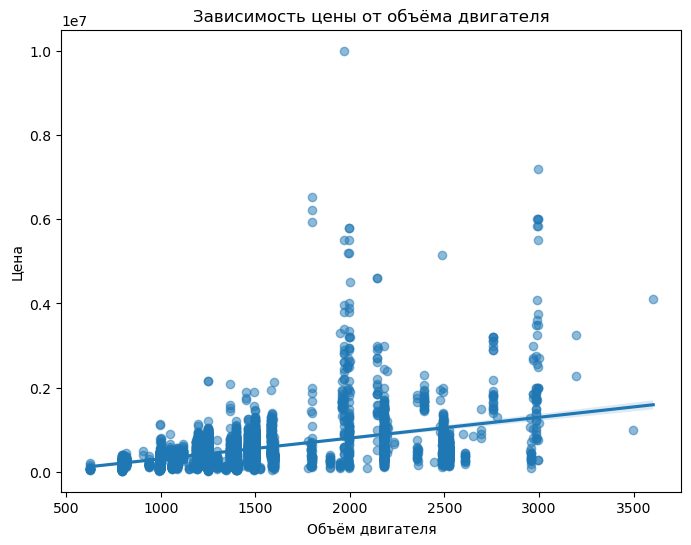

In [63]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_train_cleaned, x='engine', y='selling_price', scatter_kws={'alpha':0.5})
plt.title("Зависимость цены от объёма двигателя")
plt.xlabel("Объём двигателя")
plt.ylabel("Цена")
plt.show()

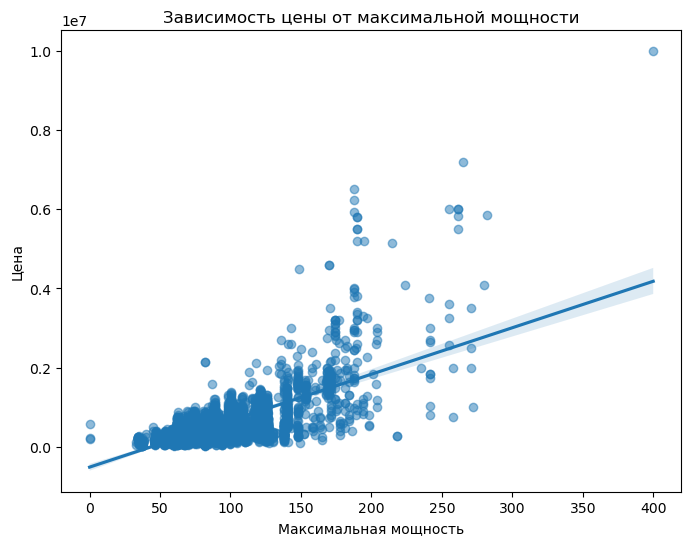

In [64]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_train_cleaned, x='max_power', y='selling_price', scatter_kws={'alpha':0.5})
plt.title("Зависимость цены от максимальной мощности")
plt.xlabel("Максимальная мощность")
plt.ylabel("Цена")
plt.show()

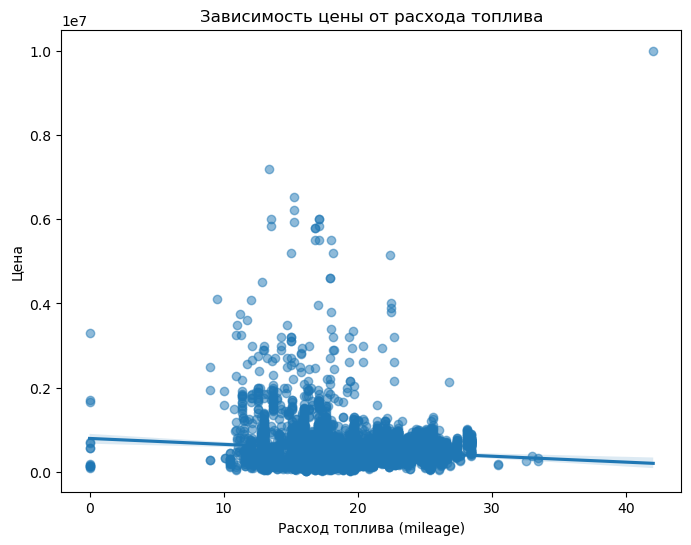

In [65]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_train_cleaned, x='mileage', y='selling_price', scatter_kws={'alpha':0.5})
plt.title("Зависимость цены от расхода топлива")
plt.xlabel("Расход топлива (mileage)")
plt.ylabel("Цена")
plt.show()

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [66]:
df_train_cleaned.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


In [67]:
X_train = numeric_train.drop(columns=['selling_price'])
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       5840 non-null   int64  
 1   km_driven  5840 non-null   int64  
 2   mileage    5840 non-null   float64
 3   engine     5840 non-null   int64  
 4   max_power  5840 non-null   float64
 5   seats      5840 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 273.9 KB


In [68]:
y_train = numeric_train['selling_price']
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5840 entries, 0 to 5839
Series name: selling_price
Non-Null Count  Dtype
--------------  -----
5840 non-null   int64
dtypes: int64(1)
memory usage: 45.8 KB


In [69]:
assert X_train.shape == (5840, 6)

In [70]:
X_test = numeric_test.drop(columns=['selling_price'])
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1000 non-null   int64  
 1   km_driven  1000 non-null   int64  
 2   mileage    1000 non-null   float64
 3   engine     1000 non-null   int64  
 4   max_power  1000 non-null   float64
 5   seats      1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [71]:
y_test = numeric_test['selling_price']
y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: selling_price
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [72]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

print("Train R^2:", r2_train)
print("Train MSE:", mse_train)
print("Test R^2:", r2_test)
print("Test MSE:", mse_test)

Train R^2: 0.5922591702157298
Train MSE: 116874153930.02907
Test R^2: 0.5941419794788383
Test MSE: 233298779730.4575


### Выводы по метрикам:
- R^2 на трейне и на тесте почти одинакова, это говорит о том, что модель в целом адекватно описывает данные.
- MSE сильно отличается, однако величина этой метрики сильно зависит от масштаба и выбросов.
- Таким образом, несмотря на почти двукратное отличие абсолютных значений MSE, стабильность R^2 указывает на схожую способность модели объяснять вариативность цены как на обучающем, так и на тестовом наборе. Это позволяет считать, что модель не страдает от сильного переобучения, хотя высокое MSE требует дополнительного анализа распределения ошибок и выбросов.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [75]:
from sklearn.preprocessing import StandardScaler

# your code here

In [76]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("Размер X_train_scaled:", X_train_scaled.shape)
print("Размер X_test_scaled:", X_test_scaled.shape)

Размер X_train_scaled: (5840, 6)
Размер X_test_scaled: (1000, 6)


In [77]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_train_pred_scaled = model_scaled.predict(X_train_scaled)
y_test_pred_scaled = model_scaled.predict(X_test_scaled)

r2_train_scaled = r2_score(y_train, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test, y_test_pred_scaled)

mse_train_scaled = MSE(y_train, y_train_pred_scaled)
mse_test_scaled = MSE(y_test, y_test_pred_scaled)

print("Train R^2:", r2_train_scaled)
print("Train MSE:", mse_train_scaled)
print("Test R^2:", r2_test_scaled)
print("Test MSE:", mse_test_scaled)

Train R^2: 0.5922591702157305
Train MSE: 116874153930.0289
Test R^2: 0.5941419794788518
Test MSE: 233298779730.44968


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

### Признак max_power

In [78]:
# your code here
coefs = model_scaled.coef_
features = X_train.columns
coef_df = pd.DataFrame({'feature': features, 'coefficient': coefs})
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()

# Сортируем по абсолютному значению коэффициента в порядке убывания
coef_df_sorted = coef_df.sort_values(by='abs_coefficient', ascending=False)
print(coef_df_sorted)

     feature    coefficient  abs_coefficient
4  max_power  322807.353259    322807.353259
0       year  152772.570846    152772.570846
3     engine   61178.494337     61178.494337
1  km_driven  -44158.818520     44158.818520
2    mileage   28833.925778     28833.925778
5      seats  -23209.132486     23209.132486


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [79]:
from sklearn.linear_model import Lasso

# your code here
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_train_lasso = MSE(y_train, y_train_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)

print("Lasso модель (alpha=1.0):")
print("Train R^2:", r2_train_lasso)
print("Train MSE:", mse_train_lasso)
print("Test R^2:", r2_test_lasso)
print("Test MSE:", mse_test_lasso)

Lasso модель (alpha=1.0):
Train R^2: 0.5922591701804456
Train MSE: 116874153940.1429
Test R^2: 0.5941408124026636
Test MSE: 233299450599.1693


### Оценка качества: схоже с линейной регрессией

In [80]:
# your code here
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lasso_model.coef_
})
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()

print("\nКоэффициенты Lasso модели:")
print(coef_df)

# Проверяем, есть ли признаки с занулёнными коэффициентами
zero_coef = coef_df[coef_df['coefficient'] == 0]
if len(zero_coef) > 0:
    print("\nСледующие признаки были занулены L1-регуляризацией:")
    print(zero_coef)
else:
    print("\nНи один коэффициент не был занулен при использовании Lasso с параметрами по умолчанию.")


Коэффициенты Lasso модели:
     feature    coefficient  abs_coefficient
0       year  152772.390214    152772.390214
1  km_driven  -44157.689858     44157.689858
2    mileage   28832.043396     28832.043396
3     engine   61173.662409     61173.662409
4  max_power  322808.236919    322808.236919
5      seats  -23206.255649     23206.255649

Ни один коэффициент не был занулен при использовании Lasso с параметрами по умолчанию.


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [81]:
from sklearn.model_selection import GridSearchCV

# your code here
# Задаём сетку параметров для alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Создаём объект Lasso с увеличенным числом итераций для сходимости
lasso = Lasso(max_iter=10000, random_state=42)

# Настраиваем GridSearchCV с 10-кратной кросс-валидацией и метрикой MSE (чем больше отрицательное значение, тем лучше)
grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Общее количество обученных моделей: число значений alpha * число фолдов (6 * 10 = 60)
num_models = len(param_grid['alpha']) * 10
print("Общее количество обученных моделей:", num_models)

# Лучший параметр регуляризации
best_alpha = grid_search.best_params_['alpha']
print("Лучший коэффициент регуляризации (alpha):", best_alpha)

# Анализ коэффициентов лучшей модели
best_model = grid_search.best_estimator_
coef = best_model.coef_
zero_coef_count = np.sum(coef == 0)
print("Количество занулённых коэффициентов:", zero_coef_count)

Общее количество обученных моделей: 60
Лучший коэффициент регуляризации (alpha): 0.001
Количество занулённых коэффициентов: 0


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [82]:
from sklearn.linear_model import ElasticNet

# your code here
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Создаём модель ElasticNet с увеличенным числом итераций для сходимости
elastic_net = ElasticNet(max_iter=10000, random_state=42)

# Настраиваем GridSearchCV с 10-кратной кросс-валидацией и оценкой по отрицательной MSE
grid_search_en = GridSearchCV(elastic_net, param_grid, cv=10,
                              scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_en.fit(X_train, y_train)

# Подсчитываем количество обученных моделей:
# Количество комбинаций гиперпараметров * число фолдов
num_models = len(param_grid['alpha']) * len(param_grid['l1_ratio']) * 10
print("Общее количество обученных моделей:", num_models)

# Выводим лучшие гиперпараметры
best_params = grid_search_en.best_params_
print("Лучшие гиперпараметры:", best_params)

Общее количество обученных моделей: 250
Лучшие гиперпараметры: {'alpha': 0.01, 'l1_ratio': 0.1}


In [83]:
# Берём лучшую модель

best_en_model = grid_search_en.best_estimator_

y_train_pred_en = best_en_model.predict(X_train_scaled)
y_test_pred_en = best_en_model.predict(X_test_scaled)

r2_train_en = r2_score(y_train, y_train_pred_en)
mse_train_en = MSE(y_train, y_train_pred_en)

r2_test_en = r2_score(y_test, y_test_pred_en)
mse_test_en = MSE(y_test, y_test_pred_en)

print("ElasticNet Best Model Metrics:")
print("Train R^2:", r2_train_en)
print("Train MSE:", mse_train_en)
print("Test R^2:", r2_test_en)
print("Test MSE:", mse_test_en)

ElasticNet Best Model Metrics:
Train R^2: -20177.468756183538
Train MSE: 5783922754878979.0
Test R^2: -10085.650041708603
Test MSE: 5798094474705810.0


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [84]:
# your code here
X_train_cat = df_train_cleaned.drop(columns=['name', 'selling_price'])

In [85]:
X_test_cat = df_train_cleaned.drop(columns=['name', 'selling_price'])

In [86]:
X_train_cat.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


In [87]:
X_test_cat.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

### Предлагаемый алгоритм закомментирован ниже:

In [88]:
#df_train_preprocessed = df_train_cleaned.copy()
#df_test_preprocessed = df_test_cleaned.copy()

# Извлекаем бренд из столбца 'name' – предполагаем, что он является первым словом
#df_train_preprocessed['brand'] = df_train_preprocessed['name'].str.split().str[0]
#df_test_preprocessed['brand'] = df_test_preprocessed['name'].str.split().str[0]

# Применяем one-hot encoding для нового признака 'brand'
#df_train_preprocessed = pd.get_dummies(df_train_preprocessed, columns=['brand'], drop_first=True)
#df_test_preprocessed = pd.get_dummies(df_test_preprocessed, columns=['brand'], drop_first=True)

# Чтобы гарантировать, что у train и test будут одинаковые признаки после кодирования,
# можно переиндексировать столбцы тестового набора в соответствии с train
#df_test_preprocessed = df_test_preprocessed.reindex(columns=df_train_preprocessed.columns, fill_value=0)

# Опционально: можно оставить столбец 'name' или удалить его, если информация из него уже полностью
# перенесена в столбцы 'brand_*'
#df_train_preprocessed.head()

In [89]:
assert X_train_cat.shape == (5840, 10)

In [90]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [91]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

df_train_encoded = pd.get_dummies(df_train[['fuel', 'seller_type', 'transmission', 'owner']], drop_first=True)
df_test_encoded = pd.get_dummies(df_test[['fuel', 'seller_type', 'transmission', 'owner']], drop_first=True)

df_train_encoded, df_test_encoded = df_train_encoded.align(df_test_encoded, join='outer', axis=1, fill_value=0)

print("Первые строки обучающего набора после кодирования:")
df_train_encoded.head()

Первые строки обучающего набора после кодирования:


,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,True,False,False,True,False,True,False,False,False,False
1,True,False,False,True,False,True,False,True,False,False
2,True,False,False,True,False,True,False,False,False,False
3,False,False,True,True,False,True,False,False,False,False
4,False,False,True,True,False,True,False,False,False,False


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       5840 non-null   int64  
 1   km_driven  5840 non-null   int64  
 2   mileage    5840 non-null   float64
 3   engine     5840 non-null   int64  
 4   max_power  5840 non-null   float64
 5   seats      5840 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 273.9 KB


In [93]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# Определяем сетку параметров для alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Создаём модель Ridge с фиксированным random_state для воспроизводимости
ridge = Ridge(random_state=42)

# Настраиваем GridSearchCV:
# - scoring='r2' позволяет использовать коэффициент детерминации как метрику качества
# - cv=10: 10-кратная кросс-валидация
grid_search_ridge = GridSearchCV(ridge, param_grid, scoring='r2', cv=10, n_jobs=-1)
grid_search_ridge.fit(X_train_scaled, y_train)

# Общее число обученных моделей: количество alpha * 10 = 6*10 = 60 моделей
print("Общее количество обученных моделей:", len(param_grid['alpha']) * 10)

# Лучшие гиперпараметры
best_params = grid_search_ridge.best_params_
print("Лучшие гиперпараметры для Ridge:", best_params)

# Получаем лучшую модель
best_ridge = grid_search_ridge.best_estimator_

# Предсказания на обучающем и тестовом наборах
y_train_pred_ridge = best_ridge.predict(X_train_scaled)
y_test_pred_ridge = best_ridge.predict(X_test_scaled)

# Вычисляем метрики
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
mse_train_ridge = MSE(y_train, y_train_pred_ridge)
mse_test_ridge = MSE(y_test, y_test_pred_ridge)

print("Ridge Regression Metrics:")
print("Train R^2:", r2_train_ridge)
print("Test R^2:", r2_test_ridge)
print("Train MSE:", mse_train_ridge)
print("Test MSE:", mse_test_ridge)

Общее количество обученных моделей: 60
Лучшие гиперпараметры для Ridge: {'alpha': 100.0}
Ridge Regression Metrics:
Train R^2: 0.5921061383428936
Test R^2: 0.5903749217507772
Train MSE: 116918018731.77461
Test MSE: 235464192083.2855


### Ответ: качество схоже с линейной регрессией

# **Часть 4. | Бизнесовая**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определите, какая лучше всего решает задачу бизнеса

In [94]:
def business_metric(y_true, y_pred):
    # your code here

    """
    Вычисляет долю предсказаний, отличающихся от реальных значений не более чем на 10%.
    
    Аргументы:
    y_true -- истинные значения (массив или Series)
    y_pred -- предсказанные значения (массив или Series)
    
    Возвращает:
    Доля корректных предсказаний (от 0 до 1)
    """
    # Вычисляем относительную ошибку
    relative_error = np.abs(y_pred - y_true) / y_true
    # Находим долю предсказаний, где относительная ошибка не превышает 10%
    within_10_percent = (relative_error <= 0.1).mean()
    return within_10_percent

# Пример: применение метрики для различных моделей
# Допустим, у нас есть следующие модели и их предсказания на тестовом наборе:
# model_linear, best_lasso, best_ridge, best_elastic (лучшие модели, подобранные GridSearchCV)

# Для демонстрации, предположим, что у нас уже есть предсказания:
# y_test_pred_linear, y_test_pred_lasso, y_test_pred_ridge, y_test_pred_elastic

# Рассчитаем метрику для каждой модели:
business_linear = business_metric(y_test, y_test_pred)
business_lasso  = business_metric(y_test, y_test_pred_lasso)
business_ridge  = business_metric(y_test, y_test_pred_ridge)
business_elastic = business_metric(y_test, y_test_pred_en)

print("Business Metric (доля прогнозов в пределах ±10% от истинного значения):")
print("Линейная регрессия:", business_linear)
print("Lasso:", business_lasso)
print("Ridge:", business_ridge)
print("ElasticNet:", business_elastic)

Business Metric (доля прогнозов в пределах ±10% от истинного значения):
Линейная регрессия: 0.227
Lasso: 0.227
Ridge: 0.224
ElasticNet: 0.0


`Your answer here`
- Лучше всего решают задачу линейная регрессия и Lasso. Остановимся на линейной регрессии.

# **Часть 5 | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [96]:
import pickle

with open("linear_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Сохраняем стандартизатор в файл scaler.pkl
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [102]:
from fastapi import FastAPI, UploadFile, File, Response
from pydantic import BaseModel
from typing import List
import pandas as pd
import numpy as np
import pickle
import io
import re

app = FastAPI()


# Загрузка обученной модели линейной регрессии и стандартизатора.
with open("linear_model.pkl", "rb") as f:
    model = pickle.load(f)
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]

def clean_numeric(value: str) -> float:
    """
    Убирает из строки всё, кроме цифр и точки, и возвращает число типа float.
    Если преобразование невозможно, возвращает np.nan.
    """
    cleaned = re.sub(r"[^0-9.]", "", value)
    try:
        return float(cleaned)
    except ValueError:
        return np.nan

def prepare_features(item: Item) -> pd.DataFrame:
    """
    Извлекает необходимые признаки для модели из объекта Item.
    Предполагается, что для предсказания используются признаки:
      - year, km_driven (уже числовые)
      - mileage, engine, max_power (перед преобразованием они могут содержать единицы измерения)
      - seats
    """
    features = {
        "year": item.year,
        "km_driven": item.km_driven,
        "mileage": clean_numeric(item.mileage) if isinstance(item.mileage, str) else item.mileage,
        "engine": clean_numeric(item.engine) if isinstance(item.engine, str) else item.engine,
        "max_power": clean_numeric(item.max_power) if isinstance(item.max_power, str) else item.max_power,
        "seats": item.seats
    }
    return pd.DataFrame([features])


def predict_price_for_item(item: Item) -> float:
    """
    Обрабатывает один объект, стандартизирует признаки и возвращает предсказанную стоимость.
    """
    df_features = prepare_features(item)
    features_scaled = scaler.transform(df_features)
    prediction = model.predict(features_scaled)
    return float(prediction[0])

@app.post("/predict_item")
def predict_item(item: Item) -> float:
    """
    Принимает JSON с признаками одного объекта и возвращает предсказанную стоимость автомобиля.
    """
    return predict_price_for_item(item)



@app.post("/predict_csv")
async def predict_csv(file: UploadFile = File(...)):
    """
    Принимает CSV-файл с признаками тестовых объектов, делает предсказания и возвращает CSV-файл с добавленным столбцом 'prediction'.
    Предполагается, что CSV содержит столбцы: year, km_driven, mileage, engine, max_power, seats.
    """
    contents = await file.read()
    df = pd.read_csv(io.BytesIO(contents))
    
    # Приводим столбцы, содержащие единицы измерения, к числовому виду
    df["mileage"] = df["mileage"].apply(lambda x: clean_numeric(str(x)))
    df["engine"] = df["engine"].apply(lambda x: clean_numeric(str(x)))
    df["max_power"] = df["max_power"].apply(lambda x: clean_numeric(str(x)))
    
    # Извлекаем нужные признаки для модели
    features = df[["year", "km_driven", "mileage", "engine", "max_power", "seats"]]
    features_scaled = scaler.transform(features)
    predictions = model.predict(features_scaled)
    df["prediction"] = predictions
    
    output_csv = df.to_csv(index=False)
    return Response(content=output_csv, media_type="text/csv")

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

